# Principal Component Analysis for Interest Rates

Is a method to decompose a set of correlated columns/variables which are non-orthogonal, into a set of uncorrelated components and a loading matrix.

<br/>
<p style="text-align: center;">$X = C * L$
<br/><br/>
    
**X =** Non-orthogonal matrix (has non-zero correlations between columns).

**C =** Is orthogonal, even the sample correlations between the columns are equal to zero. (The components of the process).

**L =** Is the loading matrix

In [8]:
library(readxl)
library(urca)
library(tsDyn)

euro_dollar_rates <- read_excel("./Module_5_Data_Euro-Dollar_Rates.xls", sheet = "Weekly,_Ending_Friday")

d_one_month_rate <- diff(euro_dollar_rates$WED1)
d_three_month_rate <- diff(euro_dollar_rates$WED3)
d_six_month_rate <- diff(euro_dollar_rates$WED6)

d_rates <- cbind(d_one_month_rate, d_three_month_rate, d_six_month_rate)
head(d_rates)

d_one_month_rate,d_three_month_rate,d_six_month_rate
-0.31,-0.08,-0.02
-0.06,-0.06,-0.01
0.00,0.01,0.09
0.01,0.05,0.06
-0.01,0.00,0.00
0.00,0.00,0.00


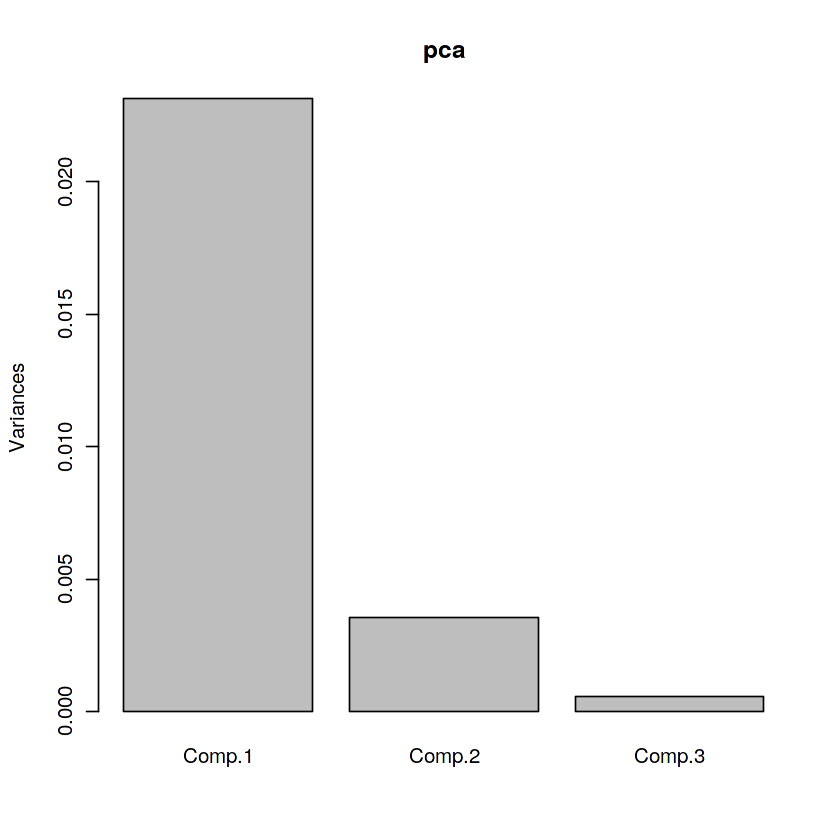

In [9]:
# Apply PCA to changes in interest rates
pca = princomp(d_rates)

# Plot the variance of the three components
plot(pca)

We observe that the first component has an almost 5 times larger variance than the second. The third component has almost a negligible variance.

This means that we can capture a large part of the variability in all threee base series by using only the first component without losing alot of information.

## Orthogonalization of the Method

Let's construct the correlation matrix between the different components (**C** is also known as scores).

In [10]:
# Compute the correlations of the components:

cor(pca$scores)

,Comp.1,Comp.2,Comp.3
Comp.1,1.000000e+00,3.144952e-17,-3.718126e-16
Comp.2,3.144952e-17,1.000000e+00,-3.017217e-16
Comp.3,-3.718126e-16,-3.017217e-16,1.000000e+00


The off diagonals are zero up to 14 decimal positions, which is exactly what the procedure wanted to achieve

We can also see the **Loading Matrix** which are the eigenvalues corresponding to the covariance matrix of the original data.

In [11]:
pca$loadings


Loadings:
                   Comp.1 Comp.2 Comp.3
d_one_month_rate    0.689  0.709  0.152
d_three_month_rate  0.521 -0.337 -0.784
d_six_month_rate    0.505 -0.619  0.601

               Comp.1 Comp.2 Comp.3
SS loadings     1.000  1.000  1.000
Proportion Var  0.333  0.333  0.333
Cumulative Var  0.333  0.667  1.000

If we were to take the [3 x 3] loading matrix and pre-multiply it by the [n x 3] score matrix (each column containing a successive component), we would recreate the original [n x 3] data on the changes in the three interest rates exactly.